In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import seffaflik
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [102]:
df_prod = uretim.gerceklesen(baslangic_tarihi='2020-06-15', bitis_tarihi='2021-06-15')

In [103]:
df_prod.corr()

,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
Saat,1.000000,0.201071,0.561394,0.007661,0.133371,0.054873,0.073144,0.042219,0.117222,-0.209858,0.003916,0.012678,0.010793,NaN,NaN,-0.049643,0.567842
Doğalgaz,0.201071,1.000000,0.191207,-0.081970,-0.376513,0.174155,-0.227500,-0.003454,0.240215,0.131513,-0.012652,-0.140536,0.043450,NaN,NaN,-0.396569,0.536774
Barajlı,0.561394,0.191207,1.000000,-0.163227,0.313946,0.076808,-0.172418,0.131216,0.222489,-0.424115,0.121961,0.071240,-0.145486,NaN,NaN,0.003387,0.804888
Linyit,0.007661,-0.081970,-0.163227,1.000000,0.074770,-0.085679,-0.063367,0.026433,-0.066912,0.167801,-0.122852,-0.054434,0.119636,NaN,NaN,0.016964,-0.098007
Akarsu,0.133371,-0.376513,0.313946,0.074770,1.000000,-0.621411,0.032058,0.202243,0.102816,0.102177,0.241574,-0.228120,0.462381,NaN,NaN,0.113804,0.083176
İthal Kömür,0.054873,0.174155,0.076808,-0.085679,-0.621411,1.000000,0.044849,-0.328325,-0.129125,-0.346088,-0.215079,0.317746,-0.684557,NaN,NaN,0.084135,0.307584
Rüzgar,0.073144,-0.227500,-0.172418,-0.063367,0.032058,0.044849,1.000000,-0.110661,-0.061754,0.012349,-0.000024,-0.044665,0.022497,NaN,NaN,0.001005,0.148478
Güneş,0.042219,-0.003454,0.131216,0.026433,0.202243,-0.328325,-0.110661,1.000000,0.132021,-0.049225,0.116183,-0.165623,0.302364,NaN,NaN,-0.039634,0.021913
Fuel Oil,0.117222,0.240215,0.222489,-0.066912,0.102816,-0.129125,-0.061754,0.132021,1.000000,-0.113320,0.256227,-0.034232,0.185387,NaN,NaN,-0.027137,0.245587
Jeo Termal,-0.209858,0.131513,-0.424115,0.167801,0.102177,-0.346088,0.012349,-0.049225,-0.113320,1.000000,-0.157442,-0.431046,0.680237,NaN,NaN,-0.354364,-0.278840


In [104]:
df_prod.drop(columns=['Nafta', 'LNG', 'Saat', 'Tarih', 'Uluslararası'], inplace=True)

In [105]:
features_list = [col for col in df_prod.columns if col!='Toplam']

features = df_prod[features_list].values
target = df_prod['Toplam'].values

In [107]:
min_val = np.min(target)
lower_quantile = np.quantile(target, 0.25)
median = np.quantile(target, 0.25)
upper_quantile = np.quantile(target, 0.75)
max_val = np.max(target)

In [129]:
target_conditions  = [ (target >= min_val) & (target  <= median),  
                      (target  > median) & (target  <= max_val),]
target_choices     = [0, 1,]

In [130]:
target_clf  = np.select(target_conditions, target_choices, default=np.nan)

(array([2196.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6588.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

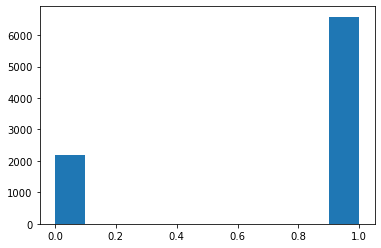

In [131]:
plt.hist(target_clf)

In [132]:
X = features
y = target_clf

In [133]:
X_train.min()

0.0

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [135]:
knn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'mms', 'knn', 'mms__clip', 'mms__copy', 'mms__feature_range', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [136]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                    ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3,5,7,9],
           'knn__weights': ['uniform', 'distance'],
           'knn__leaf_size': [15,20]}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='precision',
                      cv=5)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='precision')

In [137]:
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}

In [138]:
gs_knn.best_score_

0.9662714774497074

In [139]:
prediction = gs_knn.predict(X_test)

In [140]:
metrics.confusion_matrix(y_test, prediction)

array([[ 471,   58],
       [  76, 1591]])

In [141]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       529
         1.0       0.96      0.95      0.96      1667

    accuracy                           0.94      2196
   macro avg       0.91      0.92      0.92      2196
weighted avg       0.94      0.94      0.94      2196



(array([ 529.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1667.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

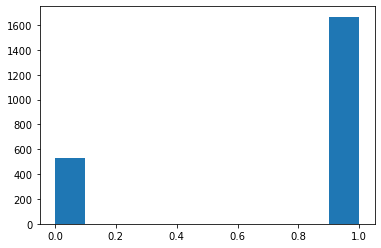

In [142]:
plt.hist(y_test)

(array([2196.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6588.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

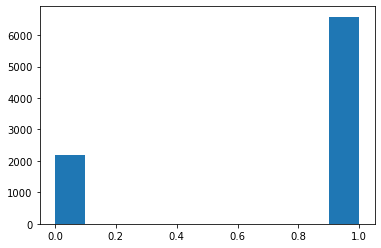

In [143]:
plt.hist(y)